# Исследование объявлений о продаже квартир

**Введение.**

В данном проекте будет проведено исследование рынка недвижимости в Санкт-Петербурге и соседних населенных пунктах в соответствии с архивом объявлений. В результате данного иссладования будет выявлена зависимость между различными параметрами и ценой объекта, а так же определены те из них которые максимально важны при оценки стоимости.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

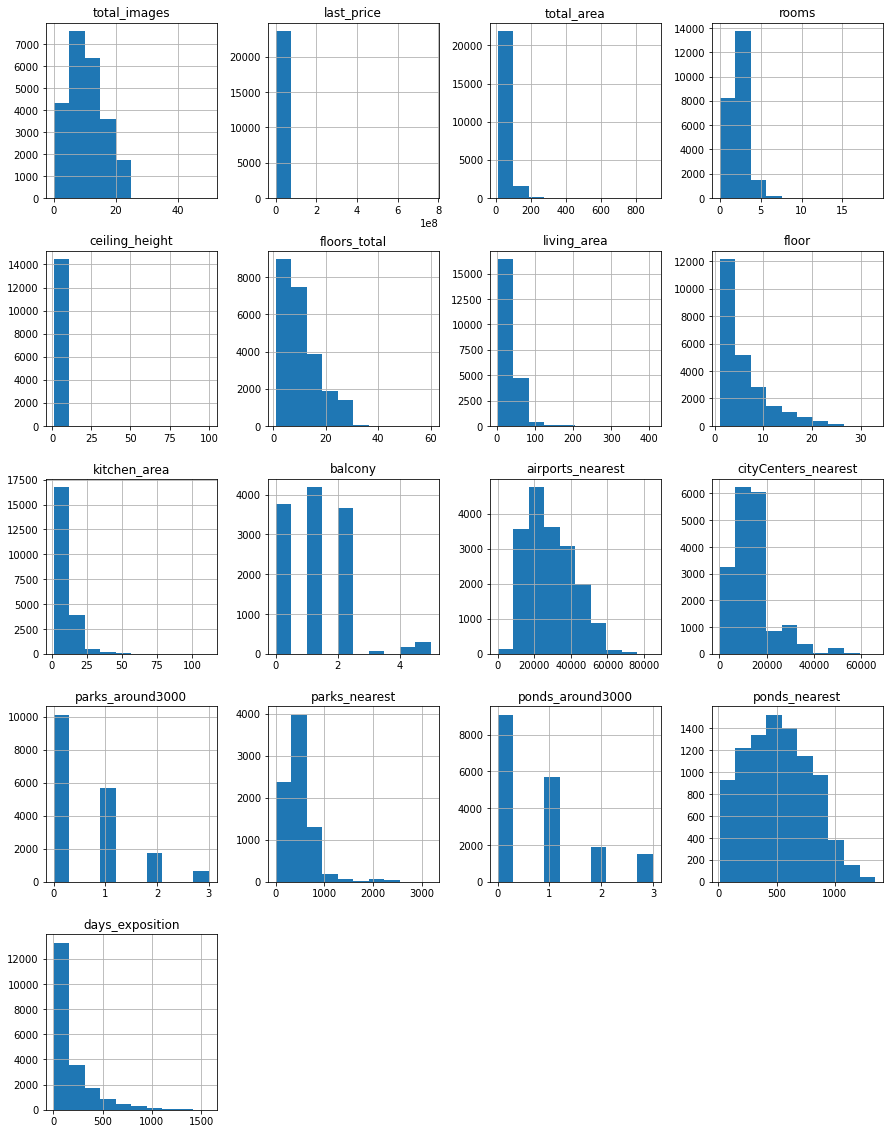

In [3]:
data.hist(figsize=(15, 20))

**Промежуточный вывод.**

В предоставленных данных выявлены пропуски данных в ряде колонок, которые требуют обработки. Данная обработка будет проведена в следующем разделе проекта.

В соответствии с приведенными выше гистограммами, с нормальным распределнием данных, но с имеющимися выбросами. Например в данных 'days_exposition' показано, что некоторые квартиры продавались до 1500 дней. Это может быть возможно, например для объектов в очень плохом состоянии, для которых крайне сложно найти покупателя, но в то же время такие данные могут искажать дальнейшее исследование.

### Выполните предобработку данных

В начале предобработки данных оценим количество пропущенных значений в представленной базе данных.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Первым действием приведем название колонки 'cityCenters_nearest' к единому варианту написания в соответствии с остальными колонками.

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Исправим тип данных в колонке 'is_apartment'.** Согласно заданию к проекту, тип данных в колонке 'is_apartment' должен быть булевым, а в базе данных он является строкой. Заменим тип данных на верный и все пропуски заменим на False, поскольку можно предположить, что данная информация не была указана поскольку объект недвижимости апартаментами не является.

In [6]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool')

data['is_apartment'] = data['is_apartment'].fillna(False)

data['is_apartment'].unique()

array([ True, False])

**Обработаем пропуски в данных о балконах, парках и прудах.** Заменим данные о балконах с пропусками на 0, поскольку если это не указали в публикации, значит скорее всего балкона в квартире нет. Согласно такой же логике можно заменить значения на ноль в колонках 'parks_around3000' и 'ponds_around3000'.
Также проанализировав первые строки базы данных, можно сделать вывод, что в строках, что наличие нулей в колонках 'parks_around3000' и 'ponds_around3000' соответствует наличию пропусков в 'parks_nearest', 'ponds_nearest', поскольку парк или пруд дальше 3км не является легко доступным, вероятнее всего рядом с объектом недвижимости не имеется парков или прудов, а удаленность их более чем на 3км не имеет значения в связи с чем данные эти не указаны, все пропуски так же заменим на 0.

In [8]:
columns_empty = ['balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']

for col in columns_empty:
    data[col] = data[col].fillna(0)


In [9]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Обработку данных относительно удаленности аэропорта** можно произвести для поселков, указанных в столбце 'locality_name'. Вероятнее всего, данные поселки не велики, в связи с чем, удаленность от аэропорта не будет различаться от объекта к объекту. Такой же логики можно придерживаться относительно данных для этих поселков в колонке 'city_centers_nearest'

In [10]:
data_airoport = data.pivot_table(
    index='locality_name', 
    values=['airports_nearest', 'city_centers_nearest'], 
    aggfunc='median'
)
data_airoport

,airports_nearest,city_centers_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5
Санкт-Петербург,26757.5,12244.5


Согласно медианным значениям удаленности от центра города в колонке 'city_centers_nearest', наименьшая удаленность в Санкт-Петербурге, поэтому скорее всего данные предоставленны для центра города СПб, в связи с чем, пропуски в этой колонке для малых поселков и городов можно заменить средними значениями.

In [11]:
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] != 'Санкт-Петербург') & (data['locality_name'] == name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == name), 'airports_nearest'].mean()
    
    data.loc[(data['locality_name'] != 'Санкт-Петербург') & (data['locality_name'] == name) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == name), 'city_centers_nearest'].mean()
    
data.isna().sum()
    

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        5479
city_centers_nearest    5455
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Удалось заполнить только часть пропусков, поскольку по некоторым населенным пунктам данные для расчета среднего значения отсутствуют полностью, в связи с чам заполнить данные пропуски не представляется возможным.

Так же **не представляется возможным заполнить пропуски в колонке days_exposition**, поскольку данная информация не связана ни с какими другими данными и не может быть определена.

In [12]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Заполним пропуски в столбцах 'living_area' и 'kitchen_area'.** Для заполнения данных пропусков рассчитаем медианное значение для доли этих помещений в квартирах по всему массиву данных. 
К сожалению, в данном методе невозможно оценить наличие коммунальных квартир, в которых в принципе отсутствует кухня. Но для решения данной проблемы, необходимо введение дополнительной информации в данные о том является ли квартира коммунальной.

In [13]:
try:
    data['living_area_percent'] = data['living_area'] / data['total_area']
    data['kitchen_area_percent'] = data['kitchen_area'] / data['total_area']
except:
    data['living_area_percent'] = NaN
    data['kitchen_area_percent'] = NaN
    
data.head()    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_percent,kitchen_area_percent
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


In [14]:
data_without_kitchen_nan = data.dropna(subset=['living_area', 'kitchen_area'])
living_percent = data_without_kitchen_nan['living_area_percent'].median()
kitchen_percent = data_without_kitchen_nan['kitchen_area_percent'].median()

living_percent, kitchen_percent 

(0.5664556962025316, 0.171875)

Заполняем все имеющиеся пропуски с учетом полученных медианных значений для этих двух помещений.

In [15]:
data.loc[(data['living_area'].isna()), 'living_area'] = data['total_area'] * living_percent
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['total_area'] * kitchen_percent
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_percent,kitchen_area_percent
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,90.066456,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


In [16]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5479
city_centers_nearest    5455
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
living_area_percent     1903
kitchen_area_percent    2278
dtype: int64

Учитывая, что в массиве данных представлено 23699 строк, строки с пропущенными значениями в столбцах 'floors_total' и 'locality_name' составляют 0,6% от общего количества строк, их удаление не может повлиять значительно на итоговые значения. 

In [17]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Удалим созданные ранее столбцы 'living_area_percent', 'kitchen_area_percent' из датафрейма.

In [ ]:
data.drop(['living_area_percent', 'kitchen_area_percent'], axis=1, inplace=True)

data.isna().sum()

**Заполним пропуски в колонке ceiling_height.** Для определения метода заполнения пропусков в колонке ceiling_height рассмотрем, существует ли зависимость между высотой потолков и населенным пунктом, предварительно удалив все аномальные значения.

In [19]:
data_middle_ceil = data.query('ceiling_height>2.2 and ceiling_height<6 and ceiling_height!="NaN"')
print(data_middle_ceil.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
data_middle_ceil.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median')

2.7


,ceiling_height
locality_name,
Бокситогорск,3.90
Волосово,2.50
Волхов,2.58
Всеволожск,2.70
Выборг,2.55
...,...
садовое товарищество Рахья,2.60
село Копорье,2.50
село Павлово,2.75


Данный расчет выглядит усредненно и не показывает какой-либо зависимости в этих данных. 

Попробуем посмотреть зависимость высоты потолка от удаленности объекта от центра города. Гипотетически, в центра Санкт-Петербурга преобладает старая застройка с более высокими потоками, в то время как в состедних населенных пунктах или в удалении от центра может преобладать советская или современная застройка с более низкими потолками.

Построим график зависимости высоты потолков от удаленности от центра:

<AxesSubplot:xlabel='city_centers_nearest'>

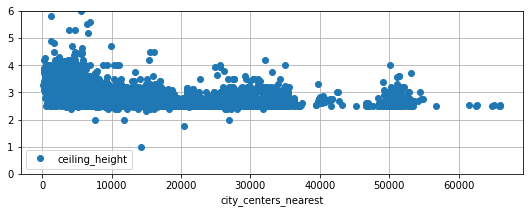

In [20]:
data.plot(x='city_centers_nearest', y='ceiling_height', style='o', ylim=(0, 6), grid=True, figsize=(9,3))

На графике прослеживается зависимость высоты потолков от близости к центру города. Напишем функцию для выделения нового столбца с категориальным значением для удаленности.

In [21]:
def location_func(location):
    try:
        if 0<=location<=5000:
            return 'city_center'
        elif 5000<location<=10000:
            return 'middle_area'
        elif 10000<location:
            return 'far_area'
    except:
        pass
    
data['area'] = data['city_centers_nearest'].apply(location_func)
        

Определим медианное значение высоты потолка в каждой из определенных зон.

In [22]:
(data.
 query('ceiling_height>2.2 and ceiling_height<6 and ceiling_height!="NaN"').
 pivot_table(index='area', values='ceiling_height', aggfunc='median').
 sort_values('ceiling_height')
)

,ceiling_height
area,
far_area,2.6
middle_area,2.8
city_center,3.1


Учитывая полученные данные, высота потолков зависит от места нахождения объекта недвижимости.
Заполним пропущенные значения исходя из полученных данных.

После этого, удалим созданный ранее столбец с распределением зон.

In [23]:
data.loc[(data['area'] == 'far_area') & (data['ceiling_height'].isna()), 'ceiling_height'] = 2.6
data.loc[(data['area'] == 'middle_area') & (data['ceiling_height'].isna()), 'ceiling_height'] = 2.8
data.loc[(data['area'] == 'city_center') & (data['ceiling_height'].isna()), 'ceiling_height'] = 3.1

data.drop(['area'], axis=1, inplace=True)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.600000,1,True,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,True,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.80,14.0,90.066456,9,True,...,27.328125,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [24]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2522
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5462
city_centers_nearest    5438
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

 **Обработка дубликатов**

**Проведем обработку дубликатов в данных.**

В первую очередь определим наличие явных дубликатов.

In [25]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Проанализируем список с уникальными названиями населенных пунктов, поскольку в нем можут содержаться различные формы написания.

In [26]:
print (len(data['locality_name'].unique()))
data['locality_name'].unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Как и предполагалось ранее, написание слова 'посёлок' имеет два варианта с буквой е и буквой ё, в связи с чем, многие населенные пункты задвоены. Так же некоторые населенные пункты с одинаковыми названиями  могут быть прописаны как "поселок городского типа" и "поселок", что так же задваивает их в списке. 

В связи с этим, оставим в данных только название населенного пункта без указания его типа.

In [27]:
def change_name(name):
    name_splited = name.split()
    new_name = name_splited[-1]
    return new_name
        
data['locality_name'] = data['locality_name'].apply(change_name)    

data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Бор', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Верево', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское',
       'Волосово', 'Волхов', 'Вруда', 'Всеволожск', 'Выборг', 'Вырица',
       'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово',
       'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка',
       'Гончарово', 'Горбунки', 'Горка', 'Гостилицы', 'Грива', 'Громово',
       'Девяткино', 'Дзержинского', 'Долина', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Ижора', 'Извара', 'Ильичёво', 'Иссад',
       'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка',
       'Кара

Приведем написание посёлка Рябово к одному формату, после всех произведенных действий обновляем индексы датафрейма.

In [28]:
len(data['locality_name'].unique())

294

**Промежуточный вывод.**

После проведенной предобработки данных, количество пропущенных данных было значительно уменьшено. Оставлены только пропуски, которые не представляется возможным заполнить с учетом имеющейся информации. 
Строки с пропущенными значениями не удалены, поскольку они в дальнейшем могут не оказывать значительного влияния.

Наличие данных пропусков так же может быть объяснено проблемами в выгрузке данных. Например, данные о ближайшем аэропорте и удаленность от центра города заполняются автоматически с учетом картографических данных, соответственно в данном процессе могут собержаться какие-либо ошибки, что должно быть сообщено разработчикам.

Также были выявлены неявные дубликаты и откорректированы. Наличие ошибок в написание объектов так же требует доработки кода со стороны разработчиков, возможно, эти данные не категориальные и заполняются в ручную, что и может привести к таким расхождениям.

In [29]:
# Расчет цены одного квадратного метра
data['price_one_meter'] = round((data['last_price']/data['total_area']), 2)

In [30]:
#День недели публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [31]:
#Месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [32]:
#Год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [33]:
#Тип этажа квартиры
data['floors_total'] = data['floors_total'].astype('int') #Тип данных в столбце 'floors_total' приводим к целочисленному.
data['floor'] = data['floor'].astype('int') ##Тип данных в столбце 'floor' приводим к целочисленному.


def floor_func(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data['floor_type'] = data.apply(floor_func, axis=1)

In [34]:
#Расстояние от центра города в километрах
data['city_centers_km'] = round((data['city_centers_nearest']/1000), 0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.600000,1,True,...,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.80,14,90.066456,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Промежуточный вывод.**

В массив данных добавлены шесть новых столбцов с рассчетами цены одного квадратного метра, дня недели, месяца и года публикации объявления, типа этажа квартиры и расстояния до центра города в километрах. Данная информация необходима для проведения дальнейшего исследования. 

### Исследовательский анализ данных

**Общая площадь квартиры**

In [35]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [36]:
data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.700000,25,True,...,0.0,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.300000,4,True,...,0.0,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
3117,19,140000000.0,631.0,2019-03-30,7,3.10,5,357.433544,5,True,...,0.0,2.0,210.0,NaN,221870.05,5,3,2019,последний,5.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.000000,5,True,...,0.0,2.0,198.0,111.0,485436.89,0,12,2017,другой,5.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.000000,3,True,...,767.0,0.0,0.0,14.0,110169.49,3,2,2019,другой,5.0
4237,1,50000000.0,517.0,2017-10-14,7,3.10,4,332.000000,3,True,...,477.0,2.0,540.0,NaN,96711.80,5,10,2017,другой,2.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.500000,7,True,...,110.0,0.0,0.0,1078.0,165680.47,3,12,2015,последний,6.0
15016,8,150000000.0,500.0,2016-01-13,4,3.20,7,283.227848,7,True,...,209.0,3.0,531.0,303.0,300000.00,2,1,2016,последний,6.0
5893,3,230000000.0,500.0,2017-05-31,6,2.80,7,283.227848,7,True,...,0.0,2.0,198.0,50.0,460000.00,2,5,2017,последний,5.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.500000,7,True,...,110.0,0.0,0.0,14.0,184848.48,0,6,2017,последний,6.0


In [37]:
data.sort_values(by='total_area', ascending=False).tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
9412,5,2100000.0,16.0,2017-12-10,0,3.10,6,13.000000,1,True,...,228.0,3.0,72.0,3.0,131250.00,6,12,2017,первый,2.0
8886,10,2450000.0,15.5,2018-08-22,0,3.10,5,10.000000,2,True,...,0.0,1.0,446.0,27.0,158064.52,2,8,2018,другой,5.0
12040,5,1900000.0,15.0,2018-06-27,1,2.50,5,8.496835,1,True,...,0.0,0.0,0.0,45.0,126666.67,2,6,2018,первый,NaN
16949,9,1550000.0,15.0,2018-08-21,1,2.70,9,8.496835,1,True,...,0.0,1.0,1079.0,42.0,103333.33,1,8,2018,первый,16.0
19642,5,1190000.0,14.0,2018-07-29,1,2.60,5,11.000000,1,True,...,0.0,0.0,0.0,4.0,85000.00,6,7,2018,первый,11.0
19558,2,1686000.0,13.2,2018-12-17,1,3.10,5,7.477215,1,True,...,361.0,1.0,155.0,19.0,127727.27,0,12,2018,первый,4.0
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,7.363924,2,False,...,644.0,0.0,0.0,24.0,142307.69,0,3,2019,другой,5.0
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,7.363924,1,True,...,0.0,1.0,185.0,410.0,107692.31,6,12,2017,первый,16.0
19807,0,3800000.0,13.0,2018-07-04,1,3.10,5,10.000000,3,True,...,592.0,3.0,27.0,9.0,292307.69,2,7,2018,другой,1.0
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.000000,2,True,...,886.0,2.0,45.0,200.0,200000.00,2,7,2017,другой,1.0


Удалим из данных одну выбивающуюся квартиру прощадью 900кв.м. и построим гистограмму. Несмотря на то, что жилой фонд в городе Санкт-Петербурге разнообразен и данная квартира, находящаяся практическив центре города, скорее всего не содержит ошибки, ее данные являются аномальными и могут значительно влиять на результаты.

<AxesSubplot:>

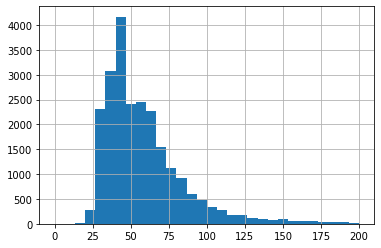

In [38]:
data = data.query('total_area != 900.0')
data['total_area'].hist(bins=30, range=(0, 200))

Согласно полученной гистограмме, наиболее популярные квартиры - это квартиры с малой площадью около 40 кв.м, медианное значение 50кв.м, что в целом соответствует тенденциям рынка недвижимости, обусловленным высокими ценами на жилье.

**Жилая площадь.**

In [39]:
data['living_area'].describe()

count    23564.000000
mean        34.552697
std         22.219178
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.000000
Name: living_area, dtype: float64

<AxesSubplot:>

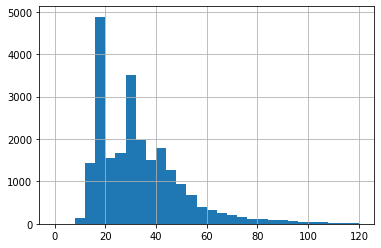

In [40]:
data['living_area'].hist(bins=30, range=(0, 120))

Полученная гистограмма может быть соотнесена с гистограммой общей площади квартир, даибольшее число квартир имеет жилую площадь 20 или 30 кв.м, что соотносимо с площадью стандартных комнат. Наличие двух пиков на гистограмме может быть обусловлено различными планировками квартир, либо данными для двух типов квартир: однокомнантыми и двухкомнатными.

**Площадь кухни.**

In [41]:
data['kitchen_area'].describe()

count    23564.000000
mean        10.478507
std          5.988700
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

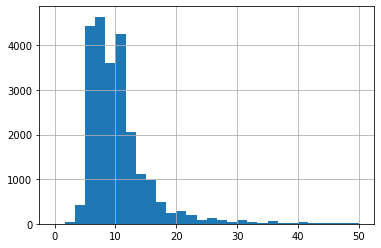

In [42]:
data['kitchen_area'].hist(bins=30, range=(0, 50))

Медианное значение 9 кв.м для кухни является соответствующим действительности. Незначительное количество квартир имеет площади кухонь вплоть до 50 кв.м., но учитывая особенности квартир Санкт-Петербурга, сложно судить о наличии ошибок в данном параметре. Квартира, имеющая максимальную площадь и максимальную площадь кухни, уже была удалена ранее.

**Цена объекта.**

In [43]:
data['last_price'].describe()

count    2.356400e+04
mean     6.522512e+06
std      1.057347e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [44]:
data.sort_values(by='last_price', ascending=False).tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
21912,0,470000.0,37.0,2018-02-18,1,NaN,3,20.958861,3,True,...,0.0,0.0,0.0,45.0,12702.70,6,2,2018,последний,NaN
18867,1,470000.0,41.0,2018-02-11,1,NaN,5,32.000000,3,True,...,0.0,0.0,0.0,46.0,11463.41,6,2,2018,другой,NaN
17676,0,450000.0,36.5,2018-02-01,1,NaN,5,17.300000,4,True,...,0.0,0.0,0.0,120.0,12328.77,3,2,2018,другой,NaN
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.300000,3,True,...,0.0,0.0,0.0,96.0,10368.66,4,8,2018,другой,NaN
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,21.808544,1,True,...,0.0,0.0,0.0,45.0,11688.31,2,7,2018,первый,NaN
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.000000,1,True,...,0.0,0.0,0.0,233.0,10714.29,0,7,2017,первый,NaN
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,22.658228,1,True,...,0.0,0.0,0.0,45.0,11000.00,1,7,2018,первый,NaN
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.000000,1,True,...,0.0,0.0,0.0,NaN,14144.74,0,4,2019,первый,NaN
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,30.588608,3,True,...,0.0,0.0,0.0,44.0,7962.96,1,6,2018,последний,NaN
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.000000,25,True,...,805.0,0.0,0.0,8.0,111.83,2,3,2019,последний,9.0


Удалим данные о самой дешевой квартире, поскольку данные выглядят неправдоподобно.

<AxesSubplot:>

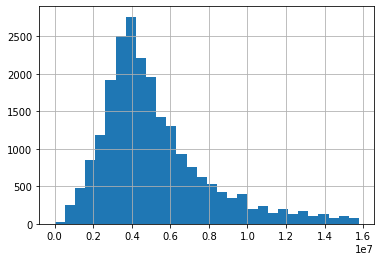

In [45]:
data = data.query('last_price != 12190.0')
data['last_price'].hist(bins=30, range=(0, 15790000))

В соответствии с представленной гистограммой, наиболее популярные объекты недвижимости стоят около 4млн.руб.(медианное значение 4,6млн.руб.). Учитывая то, что как было определено ранее, наиболее популярными являются квартиры малой площади, полученные данные соответствуют общей картине.

**Количество комнат.**

In [46]:
data['rooms'].describe()

count    23563.000000
mean         2.070237
std          1.076695
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
data.sort_values(by='rooms', ascending=False).tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
22573,8,2250000.0,24.00,2017-09-28,0,NaN,12,15.00,3,True,...,0.0,0.0,0.0,45.0,93750.00,3,9,2017,другой,NaN
9511,18,3350000.0,27.00,2018-03-02,0,2.8,18,17.40,5,True,...,0.0,0.0,0.0,179.0,124074.07,4,3,2018,другой,8.0
17182,14,1990000.0,24.40,2017-01-23,0,NaN,16,17.20,9,True,...,0.0,0.0,0.0,159.0,81557.38,0,1,2017,другой,NaN
18444,9,1900000.0,24.20,2017-09-08,0,NaN,15,18.10,1,True,...,0.0,0.0,0.0,30.0,78512.40,4,9,2017,первый,NaN
17582,11,2680000.0,22.00,2018-08-11,0,2.6,25,5.00,8,True,...,835.0,1.0,652.0,70.0,121818.18,5,8,2018,другой,12.0
6612,18,3590000.0,26.80,2017-11-10,0,2.6,24,19.00,20,True,...,0.0,0.0,0.0,15.0,133955.22,4,11,2017,другой,13.0
8776,8,2450000.0,25.00,2018-01-09,0,NaN,25,18.00,24,True,...,0.0,0.0,0.0,50.0,98000.00,1,1,2018,другой,NaN
10416,8,3700000.0,29.10,2018-08-28,0,2.6,14,20.50,2,True,...,637.0,0.0,0.0,37.0,127147.77,1,8,2018,другой,10.0
2563,4,3170000.0,28.40,2018-07-26,0,2.6,23,20.46,2,True,...,0.0,1.0,170.0,28.0,111619.72,3,7,2018,другой,17.0
10182,14,2250000.0,24.75,2018-10-02,0,NaN,19,17.20,6,True,...,0.0,0.0,0.0,13.0,90909.09,1,10,2018,другой,NaN


В квартире не может быть ноль комнат. Поскольку общая площадь объекта маленькая, скорее всего продается одна комната, например в коммунальной квартире, поэтому заполнение неправильное, заменим все нули на единицы и построим гистограмму.

In [48]:
for room in data['rooms']:
    data.loc[(data['rooms'] == 0), 'rooms'] = 1

<AxesSubplot:>

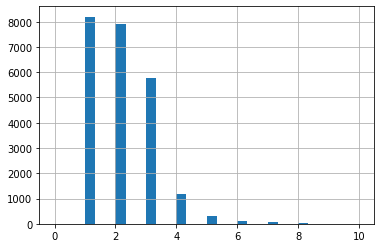

In [49]:
data['rooms'].hist(bins=30, range=(0, 10))

Как и было определено, наиболее часто продаваемыми квартирами являются квартиры малой площади, к которым можно отнести однокомнатные и двухкомнатные варианты. Данные наблюдения так же подтверждаются данной гистограммой, которая показывает, что наиболее встречающееся количество комнат это 1 или 2.

**Высота потолка.**

In [50]:
data['ceiling_height'].describe()

count    21041.000000
mean         2.744024
std          1.051449
min          1.000000
25%          2.600000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [51]:
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,223.0,3.0,30.0,19.0,600000.00,2,7,2018,последний,8.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,0.0,0.0,0.0,NaN,38666.67,0,11,2018,другой,NaN
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,0.0,3.0,511.0,NaN,108214.29,4,4,2019,другой,4.0
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,0.0,0.0,0.0,61.0,116666.67,1,4,2017,другой,10.0
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,0.0,0.0,0.0,27.0,40816.33,3,3,2018,последний,NaN
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,0.0,0.0,0.0,540.0,46296.30,4,10,2017,другой,NaN
4876,7,3000000.0,25.0,2017-09-27,1,27.0,25,17.0,17,True,...,0.0,0.0,0.0,28.0,120000.00,2,9,2017,другой,NaN
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,0.0,3.0,80.0,38.0,101875.00,2,1,2019,другой,20.0
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,0.0,0.0,0.0,73.0,69642.86,4,12,2017,другой,16.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4,22.0,2,True,...,0.0,3.0,449.0,429.0,177777.78,1,7,2017,другой,3.0


Удалим строку с высотой потолка 100 метров, поскольку даные ошибочны. Высота потолка 27 метров так же выглядит неправдоподобно, но в этих данных скорее всего допущена ошибка в порядках, поэтому уменьшим все высоты потолков выше 20 метров в 10 раз.

In [52]:
data = data.query('ceiling_height != 100.0')

In [53]:
for ceiling in data['ceiling_height']:
    data.loc[(data['ceiling_height'] >= 20.0), 'ceiling_height'] = data['ceiling_height'] / 10

data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.400000,5,True,...,0.0,0.0,0.0,315.0,99290.78,4,5,2018,другой,14.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.500000,15,True,...,440.0,2.0,450.0,136.0,117777.78,5,9,2017,другой,12.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.300000,14,True,...,0.0,1.0,613.0,14.0,125555.56,2,8,2018,другой,11.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.300000,2,False,...,0.0,0.0,0.0,125.0,46666.67,4,3,2018,другой,NaN
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.000000,2,True,...,0.0,0.0,0.0,469.0,99074.07,1,6,2015,другой,28.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.000000,1,True,...,723.0,0.0,0.0,474.0,83582.09,4,11,2016,первый,11.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.000000,7,True,...,484.0,1.0,305.0,259.0,634328.36,0,7,2017,последний,6.0
21227,0,8200000.0,71.0,2017-07-21,1,5.8,5,68.000000,5,True,...,295.0,3.0,366.0,30.0,115492.96,4,7,2017,последний,1.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,226.015823,6,True,...,149.0,2.0,577.0,719.0,149874.69,2,1,2015,последний,7.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5,83.000000,5,True,...,479.0,0.0,0.0,NaN,265734.27,3,11,2017,последний,6.0


<AxesSubplot:>

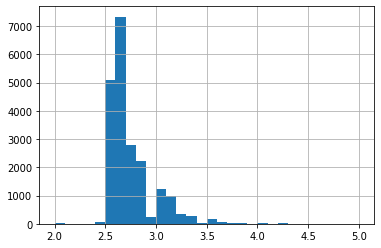

In [54]:
data['ceiling_height'].hist(bins=30, range=(2, 5))

Большинство продаваемых квартир имели высоту потолка около 2,6 метра, что соответствует стандартам застройки. Некоторые квартиры в Санкт-Петербурге имеют достаточно высокую высоту потолков, что свойственно старому жилому фонду.

**Тип этажа.**

In [55]:
data['floor_type'].describe()

count      23562
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

<AxesSubplot:>

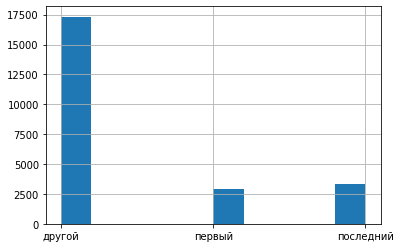

In [56]:
data['floor_type'].hist()

Большинство квартир продается на средних этажах, поскольку основная городская застройка имеет многоэтажность, поэтому вероятность покупки квартиры на средних этажах намного выше.

**Количество этажей в доме.**

In [57]:
data['floors_total'].describe()

count    23562.000000
mean        10.674900
std          6.593819
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Удалим дома этажностью выше 50. Не исключено, что такие здания имеются, это может быть верная информация, но такие данные могут влиять на исследование, поэтому удалим их из данных.

<AxesSubplot:>

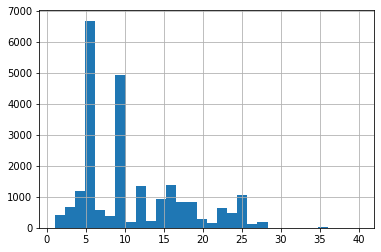

In [58]:
data = data.query('floors_total < 50')
data['floors_total'].hist(bins=30, range=(1, 40))

In [59]:
data.sort_values(by='floors_total', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,True,...,0.0,3.0,80.0,71.0,102500.00,1,10,2017,другой,20.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,True,...,0.0,3.0,80.0,NaN,122666.67,4,2,2019,другой,20.0
397,15,5990000.0,54.0,2018-03-22,2,2.60,36,21.4,28,True,...,0.0,3.0,80.0,11.0,110925.93,3,3,2018,другой,20.0
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,True,...,0.0,3.0,80.0,38.0,101875.00,2,1,2019,другой,20.0
20938,18,9900000.0,100.9,2019-04-08,3,2.60,35,53.4,22,True,...,0.0,3.0,80.0,NaN,98116.95,0,4,2019,другой,20.0
13975,19,6990000.0,65.0,2018-10-06,2,2.60,35,32.1,23,True,...,0.0,3.0,80.0,89.0,107538.46,5,10,2018,другой,20.0
8496,20,7500000.0,73.3,2017-05-18,3,2.60,35,28.0,27,True,...,0.0,3.0,80.0,250.0,102319.24,3,5,2017,другой,20.0
22946,14,7690000.0,75.0,2018-03-27,2,2.60,35,40.0,8,True,...,0.0,3.0,80.0,NaN,102533.33,1,3,2018,другой,20.0
1060,10,5200000.0,50.0,2015-11-06,2,2.60,35,39.0,15,False,...,0.0,3.0,80.0,281.0,104000.00,4,11,2015,другой,20.0
14347,14,8595000.0,69.7,2018-09-26,2,2.60,35,27.4,26,True,...,0.0,3.0,80.0,NaN,123314.20,2,9,2018,другой,20.0


Гистограмма по данному показателю имеет два явных пика. Один из них соответствует 5 этажам, второй соответствует 9 этажам. Это говорит о том, что в Санкт-Петербурге и окрестностях имеется два типа домов: старый жилой фонд с этажностью около 5 и современный жилой фонд, включеющий в том числе панельные дома, имеющий в среднем 9 этажей.

Стоит отметить, что так же в городе имеются современные высотки в 35 этажей.

**Расстояние до центра города в метрах.**

In [60]:
data['city_centers_nearest'].describe()

count    18122.000000
mean     14238.615416
std       8641.524172
min        181.000000
25%       9265.000000
50%      13123.000000
75%      16324.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

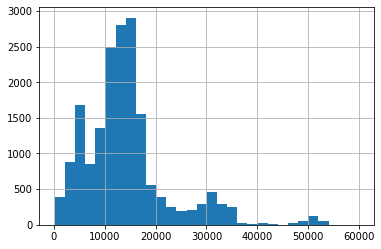

In [61]:
data['city_centers_nearest'].hist(bins=30, range=(180, 60000))

Максимальное количество продаваемых объектов недвижимости находится в 15 км от центра города. Учитывая, что самыми популярными квартирами являются квартиры меньшей площади и стоимости, то подобная удаленность может быть этим объяснена.

Стоит отметить имеющийся пик в удаленности 5 км от центра города. Действительно, недалеко от центра города в Санкт-Петербурге продается значительное количество комнат в коммунальных квартирах, не имеющих большой стоимости и соответствующих средней площади продаваемых квартир.

Максимально удаленный объект недвижимости был удален от центра города на 66 км, но выборке имеются в том числе поселки, поэтому данный показатель не является ошибкой.

**Расстояние до ближайшего парка.**

In [62]:
data['parks_nearest'].describe()

count    23560.000000
mean       167.113667
std        306.274529
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Ранее в данных о наличии парков и прудов рядом с объектами недвижимости, все пропуски были заполнены нулями. Данное заполнение повлияло на данные о расположении парков. Поэтому для проведения данного анализа не будем учитывать строки, где удаленность парков равна 0. 

count    8026.000000
mean      490.555445
std       341.606278
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

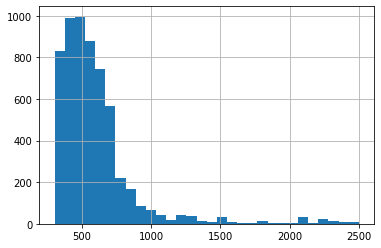

In [63]:
data_parks = data.query('parks_nearest > 0')
print(data_parks['parks_nearest'].describe())
data_parks['parks_nearest'].hist(bins=30, range=(301, 2500))

В большинстве случаев объекты недвижимости в Санкт-Петербурге не имеют парка в радиусе 3км.

Для тех домов, где парк имеется рядом, его удаленность составляет в среднем 500 метров. 

**Скорость продажи квартир.**

<AxesSubplot:>

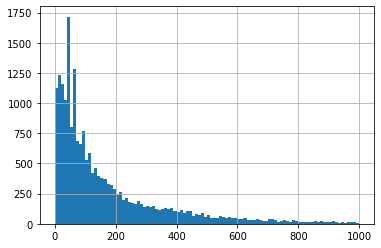

In [64]:
data['days_exposition'].hist(bins=100, range=(0, 1000))

Удилим часть квартир, которая продавалась 0 дней.

In [65]:
data_exposition = data.query('days_exposition >= 1')

В соответствии с полученной гостограммой, чеще всего квартиры продаются до 100 дней. Но так же есть объекты, которые были проданы очень быстро, а так же продавались очень долго, определим пограничные значения для классификации скорости продажи квартиры при помощи межквартильного размаха. 

Но так же есть объекты, которые были проданы очень быстро, а так же продавались очень долго, определим их количество. Для этого сократим выборку, убрав объекты, которые продавались 0 дней или более 1000 дней (2,76 года)

In [66]:
data['days_exposition'].describe()

count    20389.000000
mean       180.768846
std        219.750769
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В соответствии с полученными значениями, продажи, которые произошли быстрее 45 дней, можно считать быстрыми, а продажи дольше 231 дня - долгими. Количество таких продаж и их доля в имеющемся массиве данных:

In [67]:
print ('Количество быстрых продаж:', len(data_exposition.query('days_exposition <= 45')))

print ('Доля быстрых продаж: {:.2%}'.format(len(data_exposition.query('days_exposition <= 45'))/len(data_exposition)))

Количество быстрых продаж: 5069
Доля быстрых продаж: 24.86%


In [68]:
print ('Количество долгих продаж:', len(data_exposition.query('days_exposition > 231')))

print ('Доля долгих продаж: {:.2%}'.format(len(data_exposition.query('days_exposition > 231'))/len(data_exposition)))

Количество долгих продаж: 5094
Доля долгих продаж: 24.98%


Расчет совпадает с определенными ранее квартилями.

Определим среднее и медианное значение скорости продаж для всего массива данных:

In [69]:
data_exposition['days_exposition'].mean()

180.76884594634362

In [70]:
data_exposition['days_exposition'].median()

95.0

Определим среднее и медианное значение скорости продаж для массива данных без учета долгих и быстрых продаж:

In [71]:
data_exposition.query('days_exposition > 45 and days_exposition < 231')['days_exposition'].mean()

107.8764210113681

In [72]:
data_exposition.query('days_exposition > 45 and days_exposition < 231')['days_exposition'].median()

95.0

Медианное значение показало, что продажа квартиры в среднем занимала 95, данное значение соответствует как для всего массива данных, так и для выборки без учета быстрых и долгих продаж. 
Среднее значение данного показателя показало значительную зависимость от аномальных значений. Так при сокращении выборки путем удаления очень быстрых продаж и очень долгих продаж, данное значение изменилось значительно со 180,8 дней до 107.

**Определим факторы, которые максимально влияют на стоимость объекта**

In [73]:
# Зависимость цены от общей площади квартиры
data['last_price'].corr(data['total_area'])

0.6431499771449899

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

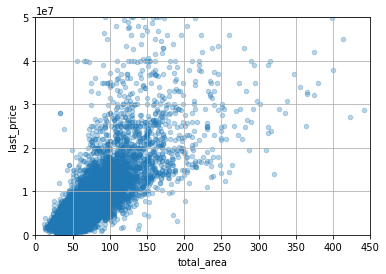

In [74]:
data.plot(x='total_area', y='last_price', kind='scatter', ylim=(0 ,5*10**7), xlim=(0, 450), alpha=0.3, grid=True)

In [75]:
# Зависимость цены от жилой площади квартиры
data['last_price'].corr(data['living_area'])

0.5799643684515986

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

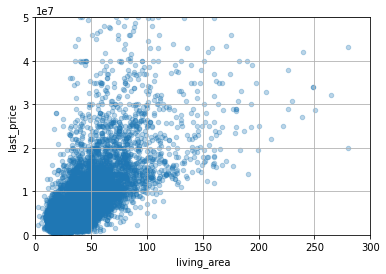

In [76]:
data.plot(x='living_area', y='last_price', kind='scatter', ylim=(0 ,5*10**7), xlim=(0, 300), alpha=0.3, grid=True)

In [77]:
# Зависимость цены от площади кухни в квартире
data['last_price'].corr(data['kitchen_area'])

0.505641343020175

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

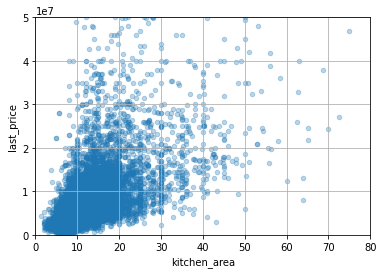

In [78]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', ylim=(0 ,5*10**7), xlim=(0, 80), alpha=0.3, grid=True)

In [79]:
# Зависимость цены от количества комнат
data['last_price'].corr(data['rooms'])

0.36197823930119616

In [80]:
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 19])

<AxesSubplot:xlabel='rooms'>

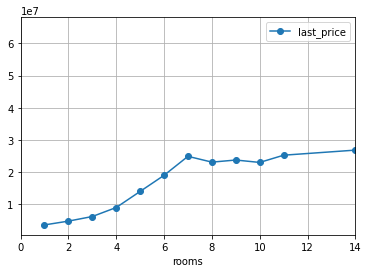

In [81]:
(data.
 pivot_table(index='rooms', values='last_price', aggfunc='median').
 plot(style='o-', xlim=(0, 14), grid=True)
)

<AxesSubplot:xlabel='floor_type'>

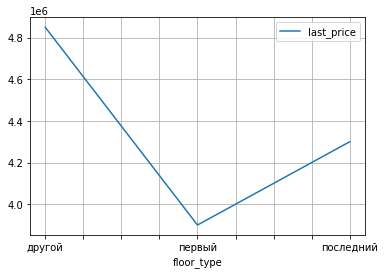

In [82]:
# Зависимость цены от этажа
(data.
 pivot_table(index='floor_type', values='last_price', aggfunc='median').
 plot(style='-', grid=True)
)

In [83]:
# Зависимость цены от дня, когда было выставлено объявление
data['last_price'].corr(data['weekday_exposition'])

0.0019174191017565423

<AxesSubplot:xlabel='weekday_exposition'>

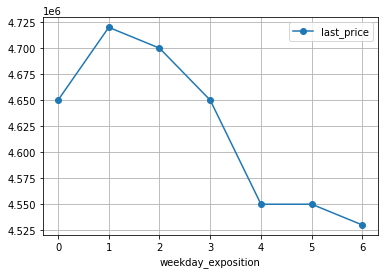

In [84]:
(data.
 pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').
 plot(style='o-', grid=True)
)

In [85]:
# Зависимость цены от месяца, когда было выставлено объявление
data['last_price'].corr(data['month_exposition'])

0.00012817842259378774

<AxesSubplot:xlabel='month_exposition'>

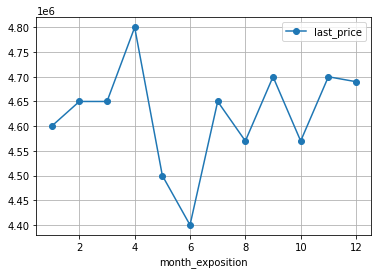

In [86]:
(data.
 pivot_table(index='month_exposition', values='last_price', aggfunc='median').
 plot(style='o-', grid=True)
)

In [87]:
# Зависимость цены от года, когда было выставлено объявление
data['last_price'].corr(data['year_exposition'])

-0.04361088172603296

<AxesSubplot:xlabel='year_exposition'>

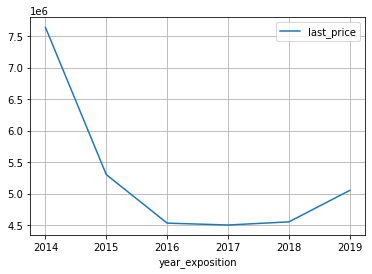

In [88]:
(data.
 pivot_table(index='year_exposition', values='last_price', aggfunc='median').
 plot(style='-', grid=True)
)

В соответствии с проведенным расчетом коэффициента корреляции, наибольшее влияние на стоимость квартиры оказывает ее прощадь (коэффициент составляет 0,64). Площадь кухни и жилая площадь так же оказывают влияние на стоимость, поскольку являются взаимосвязанными величинами с общей площадью квартиры (в том числе поскольку заполнение пропусков в начале исслодования проводилось в соответствии с линейной зависимостью). Построенные диаграммы рассеяния подтверждают данную зависимость. На графике при увеличении площади квартиры до 150кв.м прослеживается пропорциональная зависимость роста цены, после достижения данного метража, зависимость становится меньше, возможно, данный эффект связая с некоторой уникальностью каждого крупного объекта недвижимости.

Несмотря на то, что в соответствии с минимальным коэффициентом корреляции год, месяц, день размещения, этаж, и количество комнат никак не влияют на стоимость жилья, в ходе построения графиков была выявлена описанная ниже зависимость.

Как правило, стоимость квартиры меняется пропорционально увеличению количества комнат. Зависимость более сильная для шестикомнатных квартир и меньше, далее данная зависимость слабеет.

Этаж так же оказывает непосредственное влияние на стоимость квартиры. В соответствии с графиком, недвижимость стоит дешевле на первом этаже, дороже на последнем и самые дорогие располагаются на других этажах.

День недели так же может влиять на стоимость. Дак квартиры, выставленные на продажу в рабочие дни были проданы дороже квартир, выставленных в выходные.

Зависисмость стоимости квартиры от месяца, когда было выставлено объявление, показало, что квартиры, выставленные на продажу в начале лета (июне) значительно дешевле квартир, выставляемых в другие месяцы, особенно в апреле.

График зависимости стоимости квартиры от года продажи показал падение стоимости квартир на 40% в 2016 году по сравнению с 2014 годом. 2017 и 2018 годы были так же неудачными для выгодных продаж, после чего стоимость квартир вновь начала увеличиваться.


**Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с большим числом объявлений.** 

In [91]:
data_price_one_metre = data.pivot_table(index='locality_name', values='price_one_meter', aggfunc=('count', 'mean'))
data_price_one_metre=data_price_one_metre.query('count>220')
data_price_one_metre.columns=['number_of_locations', 'mean_price_one_metre']
data_price_one_metre.sort_values('number_of_locations')

,number_of_locations,mean_price_one_metre
locality_name,,
Выборг,237,58141.909325
Гатчина,307,68746.146515
Парголово,327,90175.913089
Колпино,338,75424.579112
Пушкин,369,103125.819377
Всеволожск,398,68654.473970
Шушары,439,78551.344647
Кудрово,470,95260.846128
Мурино,586,86041.116024


In [92]:
data_price_one_metre.sort_values('mean_price_one_metre')

,number_of_locations,mean_price_one_metre
locality_name,,
Выборг,237,58141.909325
Всеволожск,398,68654.473970
Гатчина,307,68746.146515
Колпино,338,75424.579112
Шушары,439,78551.344647
Мурино,586,86041.116024
Парголово,327,90175.913089
Кудрово,470,95260.846128
Пушкин,369,103125.819377


Как видно из таблиц выше, Санкт-Петербург лидирует как по количеству продаваемых объектов, так и по средней цене квадратного метра.
Из выбранных 10 населенных пунктов с наибольшим количеством продаваемых объектов, самая дешевая цена квадратного метра в Выборге.

**Проведем отдельное исследование для квартир в Санкт-Петербурге.**

Округлим километраж до центра города до целых значений. Это позволит провести расчет по километрам, без учета лишних величин.

In [93]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.80,14,90.066456,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.60,24,40.558228,22,True,...,0.0,0.0,0.0,NaN,110544.69,3,4,2019,другой,12.0


In [94]:
data_spb = data_spb.pivot_table(index='city_centers_km', values='price_one_meter', aggfunc='mean')

<AxesSubplot:xlabel='city_centers_km'>

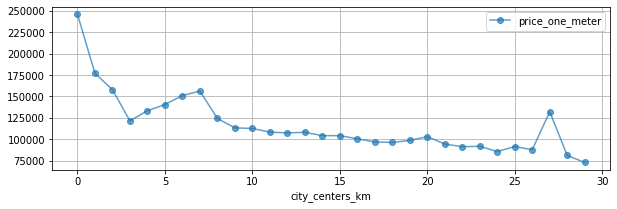

In [95]:
data_spb.plot(y='price_one_meter', style='o-',alpha=0.7, grid=True, figsize=(10,3))

В соответствии с данным графиком видна явна зависимость стоимости квадратного метра недвижимости от ее расположения по отношению к центру города. Максимально дорогие объекты находятся в непосредственном центре, по мере удаления от него цена постепенно снижается и достигает минимального значения в 27 км от центра города, что является максимальным удалением для Санкт-Петербурга.

**Промежуточный вывод.**

Учитывая полученные результаты расчетов, можно сделать вывод, что не все параметры объектов недвижимости оказывают какое-либо влияние на цену объекта. В частности, не важно когда было выставлено объявление, на цене это отражаться не будет.
В то же время, было лпределено, что стоимость квартиры зависит от ее площади и расположения, причем важно не только удаление от центра города, но и населенный пункт. 

**<font color='red'>ОБЩИЙ ВЫВОД ПО ПРОЕКТУ.</font>**

В данном проекте были проанализированы данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Данная информация включала данные о населенном пункте, стоимость объекта недвижимости, его расположение по отношению к паркам, прудам и удаленность от ценра города Санкт-Петербург, площадь объекта, этажность строения и этаж самого объекта.

На первом шаге работы была проведена **предобработка данных**, включающая: предварительный анализ основной информации о базе данных, выявление пропусков в различных категориях данных и последующее их заполнение различными методами, приведение данных к одному виду написания (использование только буквы ё в словах), что позволило удалить неявные дубликаты.

Для непосредственного проведения исследования в массив данных были **добавлены шесть новых столбцов** с рассчетами цены одного квадратного метра, дня недели, месяца и года публикации объявления, типа этажа квартиры и расстояния до центра города в километрах.

**Согласно полученным расчетам, наиболее популярные квартиры** - это квартиры с малой площадью около 40 - 50кв.м (жилая площадь 20 или 30 кв.м и кухня 9 кв.м), что в целом соответствует тенденциям рынка недвижимости, обусловленным высокими ценами на жилье. Такие объекты недвижимости (однокомнатные и двухкомнатные  квартиры) стоили около 4,6млн.руб. Большинство продаваемых квартир имели высоту потолка около 2,6 метра и находились на средних этажах в пятиэтажных или девятиэтажных строениях. Максимальное количество продаваемых объектов недвижимости находится в 15 км от центра города Санкт-Петербурга. Так же можно отметить, что в большинстве случаев объекты недвижимости в Санкт-Петербурге не имеют парка в радиусе 3км, а квартиры чаще всего продаются до 100 дней. 

**В ходе проведения исследования с целью поиска зависимости стоимости квартиры от различных факторов, <font color='blue'>были выявлены следующие зависимости</font>**:
- наибольшее влияние на стоимость квартиры оказывает ее прощадь, как общая, так и жилая, а так же площадь кухни (максимальный коэффициент корреляции для этих параметров составляет 0,64). Построенные диаграммы рассеяния подтверждают это наиболее наглядно для квартир площадью до 150кв.м.
- стоимость квартиры увеличивается пропорционально увеличению количества комнат. Зависимость более сильная для шестикомнатных квартир и меньше, далее данная зависимость слабеет.
- недвижимость стоит дешевле на первом этаже, дороже на последнем и наиболее высокой стоимостью обладают объекты, расположенные на других этажах.
- день недели, месяц и год, когда было выставлено объявление, так же может влиять на стоимость. Квартиры, выставленные на продажу в рабочие дни были проданы дороже квартир, выставленных в выходные. Зависисмость стоимости квартиры от месяца, показало, что квартиры, выставленные на продажу в начале лета (июне) значительно дешевле квартир, выставляемых в другие месяцы, особенно в апреле. Возможно это связано с существующим спросом на рынке недвижимости в данные месяцы. График зависимости стоимости квартиры от года продажи показал падение стоимости квартир на 40% в 2016 году по сравнению с 2014 годом. 2017 и 2018 годы были так же неудачными для выгодных продаж, после чего стоимость квартир вновь начала увеличиваться.

В имеющихся данных, **Санкт-Петербург** лидирует как по количеству продаваемых объектов, так и по средней цене квадратного метра. Также была определена явна зависимость стоимости квадратного метра недвижимости в Санкт-Петербурге от ее расположения по отношению к центру города. Максимально дорогие объекты находятся в непосредственном центре, по мере удаления от него, цена постепенно снижается и достигает минимального значения в 27 км от центра города, что является максимальным удалением для Санкт-Петербурга. 

С учетом полученной информации, выявлены явные зависимости стоимости объектов недвижимости от перечисленных выше факторов, что сможет позволить проводить автоматизарованную оценку недвижимости для Санкт-Петербурга и его окрестностей.

**<font color='blue'>Рекомендации.</font>**
В заключении проведенного исследования можно отметить некоторые направления в улучшении данных, связанные с выявленными ошибками в их подготовке, особенно основанных на автоматических данных, полученных из геосервисов. Наличие значительного отсутствия такой информации может говорить о несовершенстве системы ее сбора. Также необходимо обратить внимание на категоризацию населенных пунктов, поскольку различное их написание приводит к задвоению во многих случаях. Данные, предоставляемые пользователями по каким-то причинам так же отсутствуют в некоторых категориях, например, высоте потолка. Возможно, люди не заполняют это, поскольку просто не владеют данной информацией, поэтому возможно, стоит пересмотреть данную систему. 
Также стоит рассмотреть возможность указания в данных информации является ли квартира коммунальной. Данный фактор так же может быть ключевым, поскольку во-первых это оказывает непосредственное влияние на то, имеется ли кухня в квартире. Без данного показателя корректное заполнение пропусков в данной колонке невозможно, соответственно и расчет влияния площади кухни на стоимость квартиры может не отражать всей действительности. В целом, система сбора данных требует доболнительной доработки и корректировки с целью качественного проведения дальнейших исследований.

Также в рекомендациях необходимо отметить, что в имеющейся базе даных никак не отражено наличие ближайших станций метро или веток железнодорожного транспорта по отношению к объектам недвижимости. Рассмотрение данных зависимостей может существенно улучшить результаты проводимого исследования, поскольку данная информация может существенно влиять как на стоимость объекта недвижимости, так и на скорость его продажи.